### Presenté par : Bradid yassmine option : master 2 IAA

## <ins> ETAPE 1 : ouverture des images satellitairestext </ins>


### 1 - Lecture et affichage des images satellitaires (TM1, TM2, TM3 et TM4) captés au niveau de gris 
pour faire la lecture des images on utilise le module des syteme d'exploitation ``` os.chdir() ```et l'affichage se fait en tutilisant la biblio ```matplotlib.pyplot``` ( Tracer des tableaux numpy sous forme d'images) avec la fonction ```imshow()```


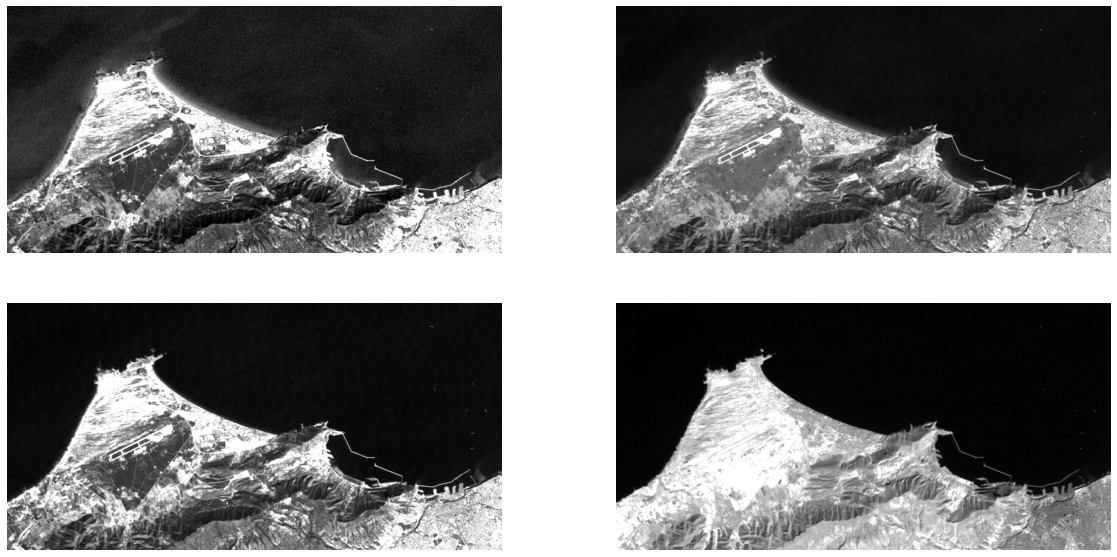

In [43]:
import matplotlib.pyplot as plt
import os
import cv2 
import numpy as np 
from numpy import array
import rasterio
from rasterio.plot import adjust_band
from rasterio.plot import show

#defenir le chmin du fichier (remplace le répertoire de travail actuel par le chemin indiqué)
os.chdir('C:/Users/dell/Documents/M2/ISAT/Images satellitaires du TP1-20210117/')
#renvoie une liste contenant les noms des entrées dans le répertoire donné par chemin
files = os.listdir('C:/Users/dell/Documents/M2/ISAT/Images satellitaires du TP1-20210117/')

#pour afficher les images les uns pres de l'autres 
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()
#pour chaque image dans le fichier des images satellitaires on fait la lecture et  l'affichage 
for img, ax in zip(files, axs):
    img = plt.imread(img) #lecture
    ax.axis('off') #pas  d'axes
    ax.imshow(img) #affichage 
plt.show() #affichage
    

### observation :
on remarque que les images ont été prise sous niveau de gris sur la meme geolocalisation mais chaque canal a son propre resultat ,chaque capteurs concetre sur  des zones bien precise ya des zones ou les couleurs sont plus claire ou foncés  que l'autres et ya des zones qui sont plus nette et d'autres non .

par exemple on peut remarqué que :
- TM1 on voit un peu la mere ( nuances de gris les vagues) .
- TM3 se focalise sur l'architecture et urbanisme (blancs eclatant).
- TM4 peut etre tout ce qui nature et plantes ( on remarque presque aucune contruction urbaine) .

## <ins> ETAPE2 : affichage d’une image en couleur</ins>


### 1- Faire une composition de trois images des 3 canaux 
  Les images en niveaux de gris sont agréables, mais la plupart des informations que nous pouvons recevoir proviennent de l'examen de l'interaction entre les différentes bandes. Pour ce faire,nous lisons les images avec ``` rasterio.open()``` ensuite nous pouvons mapper différentes bandes spectrales sur les canaux rouge, vert et bleu  . dans cette partie en premier on fait ressortir les couleur RGB des 3 canaux ( TM1 ,TM2 ,TM4) en utilisant ```Rasterio``` qui possède sa propre fonction ```show ()``` conçue pour gérer ca , qui a en parametre ```cmap```qui va nous permettre de choisir ```Reds , Greens of Blues ``` et les afficher . 


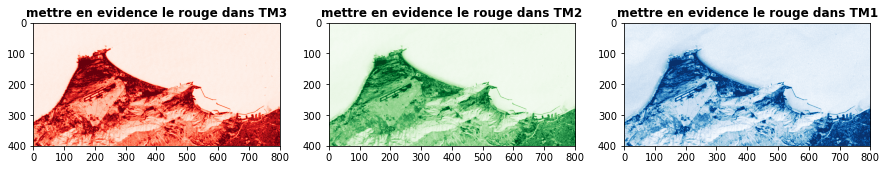

In [82]:
#ouvrir les images
image3 = rasterio.open('C:/Users/dell/Documents/M2/ISAT/Images satellitaires du TP1-20210117/TM3.bmp')
image2 = rasterio.open('C:/Users/dell/Documents/M2/ISAT/Images satellitaires du TP1-20210117/TM2.bmp')
image1 = rasterio.open('C:/Users/dell/Documents/M2/ISAT/Images satellitaires du TP1-20210117/TM1.bmp')
image4 = rasterio.open('C:/Users/dell/Documents/M2/ISAT/Images satellitaires du TP1-20210117/TM4.bmp')
image5 = rasterio.open('C:/Users/dell/Documents/M2/ISAT/TM5.bmp')
image7 = rasterio.open('C:/Users/dell/Documents/M2/ISAT/TM7.bmp')
# affichage des 3 images avec extraction de couleurs roge , vert , bleu dans chaques image
# Initialiser les sous-graphiques
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(15,7))
#faire voir la couleur roude de TM3
show((image3 , 1), ax=axr, cmap='Reds', title='mettre en evidence le rouge dans TM3')
#faire ressortir la couleur roude de TM2
show((image2, 2), ax=axg, cmap='Greens', title='mettre en evidence le rouge dans TM2')
#faire voir la couleur roude de TM1
show((image1 ,3), ax=axb, cmap='Blues', title='mettre en evidence le rouge dans TM1')

 #### au dessus : un petit exemple   d'exctraction de couleur des 3 images que j'ai choisis  TM3 , TM2 , TM1

### A- La première composition TM3, TM2 et TM1

On empile trois bandes dans les spectres rouge, vert et bleu (RVB) pour produire une image couleur qui ressemble à ce que nous voyons avec nos yeux . 

Nous devons d'abord lire les bandes dans des tableaux ```numpy``` avec``` img.imread()``` ensuite avec l'aide de ```imshow()``` de ```matplotlib``` nous indique que nous devons normaliser nos bandes dans une plage de 0 à 1 avec la fonction  ```normalize() ``` (Fonction pour normaliser les valeurs de la grille). Pour ce faire, nous allons effectuer une simple échelle linéaire en supprimant tout ce qui est plus ou moins grand.

Ensuite avec la fonction de numpy ``` dstack ```  elle va prendre une séquence de tableaux et les empile le long du troisième axe pour créer un seul tableau(empiler des tableaux 2D (images) dans un seul tableau 3D pour le traitement )

Text(0.5, 0.98, 'Premiere composition TM3 , TM2 , TM1 ')

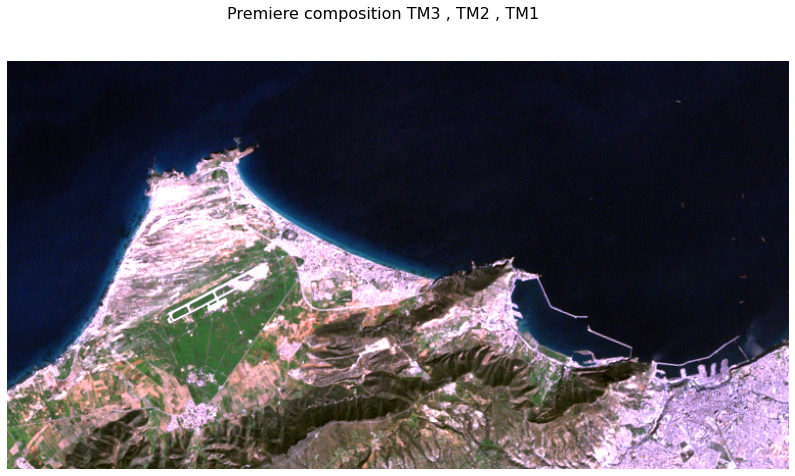

In [57]:

# Lire les valeurs de la grille dans des tableaux numpy
red = image3.read(1)  #llire image TM3
green = image2.read(2) #lire image TM2
blue = image1.read(3) #lire image TM1

#Fonction pour normaliser les valeurs de la grille
def normalize(array):
   #normaliser les valeurs des cellules dans une échelle allant de 0,0 à 1,0
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normaliser les bandes
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

# Créer une composition de couleur RVB
# en faisant un empilement  de 3 sequence des tableaux de chaque bandes ( rouge verte bleue )
rgb = np.dstack((redn, greenn, bluen))
 #affichage
fig = plt.figure()
fig.set_size_inches(14,7.5)   #TAILLE d'affichage
plt.axis('off')
plt.imshow(rgb,aspect='auto') #affichage
plt.savefig("rgb.png",bbox_inches='tight',pad_inches=0)
fig.suptitle('Premiere composition TM3 , TM2 , TM1 ', fontsize=16) #titre


### B- La deuxième composition TM4, TM2 et TM1

Text(0.5, 0.98, 'Deuxieme composition TM4 , TM2 , TM1 ')

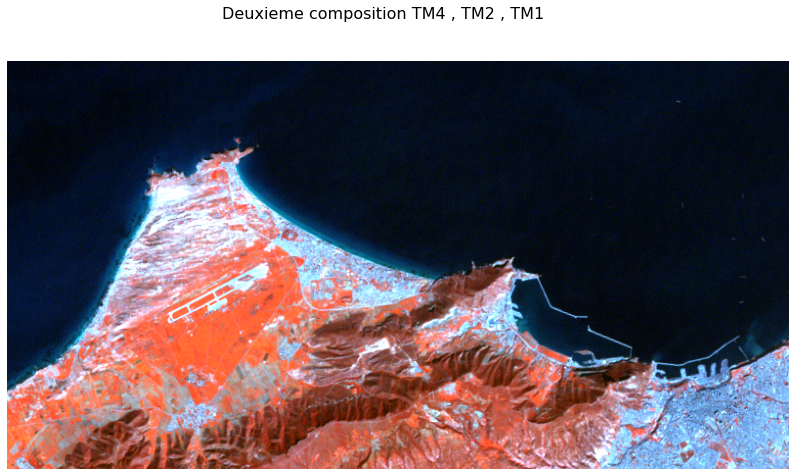

In [61]:
# Lire les valeurs de la grille dans des tableaux numpy
red = image4.read(1)  #llire image TM4
green = image2.read(2) #lire image TM2
blue = image1.read(3) #lire image TM1

#Fonction pour normaliser les valeurs de la grille
def normalize(array):
   #normaliser les valeurs des cellules dans une échelle allant de 0,0 à 1,0
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normaliser les bandes
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)


# Créer une composition de couleur RVB
# en faisant un empilement  de 3 sequence des tableaux de chaque bandes ( rouge verte bleue )
rgb = np.dstack((redn, greenn, bluen))
 #affichage
fig = plt.figure()
fig.set_size_inches(14,7.5)   #TAILLE 
plt.axis('off')
plt.imshow(rgb,aspect='auto')
plt.savefig("rgb1.png",bbox_inches='tight',pad_inches=0)
fig.suptitle('Deuxieme composition TM4 , TM2 , TM1 ', fontsize=16)

### Observation : 
-1er composition :on remarque que le traitement qu'on  avec les 3 bandes qui a fait a pu nous generer une image en couleur qui a plus de sens , ou on peut extraire plusieurs informations de cette carte. par exemple(  Distinction entre les espèces végétales, des
plantes à feuilles ou sans feuilles ;Identification des traits culturels et urbains ...Ect)

-2eme composition /on remarque les zones prés de la mer sont bleu et ce qui est a l'interieur est en rouge ,comme il a été mentionné dans la fiche tp la 4eme bandes "TM4" c'ets une proche infrarouge tout ce qui permet de délimitation des étendues d’eau ; humidité dans le sol .... )  donc peut etre ce uqi en bleu c'est tout ce uqi humidité et source d'eau .


### 2- toute autre combinaison est possible ,de n'importe quelle image en niveau de gris on peut extraire des couleurs rgb ce qui fait une image en couleur est possible car chaque image sattelitaire represente une bande et chaque bande est responsable a capter  des zones et des caracterestiques bien precises et chaque bande est appliqué pour extraire des information bien precises ( comme il a été mentionné dans le tableau des bandes ) 

### Exmple : 
voici un exemple  j'ai choisis 3 images TM5 , TM3 et TM2 

Text(0.5, 0.98, 'deuxiemecomposition TM5 , TM3 , TM1 ')

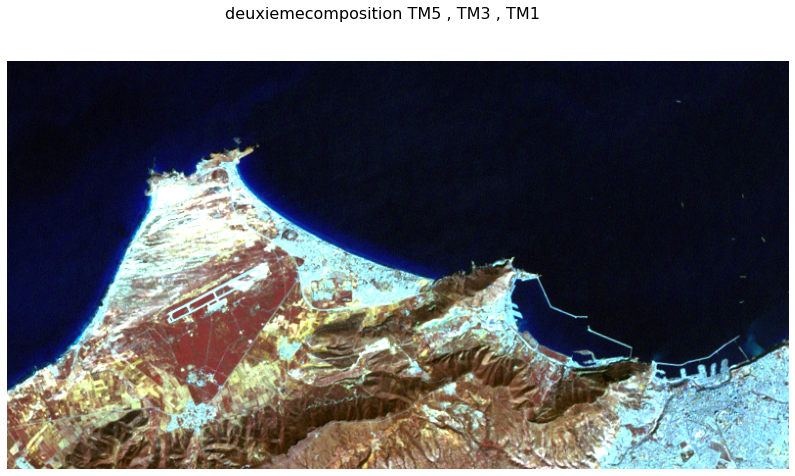

In [65]:
# Lire les valeurs de la grille dans des tableaux numpy
red = image5.read(1)  #llire image TM4
green = image3.read(2) #lire image TM2
blue = image1.read(3) #lire image TM1

#Fonction pour normaliser les valeurs de la grille
def normalize(array):
   #normaliser les valeurs des cellules dans une échelle allant de 0,0 à 1,0
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normaliser les bandes
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)


# Créer une composition de couleur RVB
# en faisant un empilement  de 3 sequence des tableaux de chaque bandes ( rouge verte bleue )
rgb = np.dstack((redn, greenn, bluen))
 #affichage
fig = plt.figure()
fig.set_size_inches(14,7.5)   #TAILLE 
plt.axis('off')
plt.imshow(rgb,aspect='auto')
plt.savefig("rgb2.png",bbox_inches='tight',pad_inches=0)
fig.suptitle('deuxiemecomposition TM5 , TM3 , TM1 ', fontsize=16)

 ### Observation : 
 on remarque que ce qui demarque c'est le bleu de la cote et le vert des plantes et en comparant avec le tableau effectivement:
 
-TM5 est resposable poru 'lapplication des Distinction entre la neige et les nuages , Sensible à l’humidité dans le sol et les
plantes .d'ou s'explique le bleu . 

-TM3 Distinction entre les espèces végétales, des plantes à feuilles ou sans feuilles ;Identification des traits culturels et urbains dou s'explique le vert 

-TM1  Distinction entre le sol et la végétation, Identification des traits culturels et urbains ( ils sont bien visible ) ...ect 


## <ins> Etape 3 : afficher l’histogramme des images satellitaires en nuances de gris</ins>


### 1-Affiche l’histogramme aux niveaux de gris pour les trois images TM1, TM2 et TM3.
pour cela on va crée une fonction numpy qui convertit notre image bidimensionnelle en un tableau unidimensionnel ```np.array()```.
 nous utilisons la fonction ```Image.open()``` pour charger notre image.  ensuite on  transforme l'image en niveaux de gris avec une plage de valeurs de 0 à 1 lors du chargement de l'image. 
 
 Nous continuerons à travailler avec des images dans la plage de valeurs de 0 à 1 .nous pouvons transformer une image de 0 à 255 .  Nous passons en 256 car nous voulons voir le nombre de pixels pour chacune des 256 valeurs possibles dans l'image en niveaux de gris.
 
 et tout cela se fait par la fonction de matplotlib.pyplot ``` plt.hist()``` qui retournera un tuple ```(n , bins, patches)```.
 n: est le nombre de comptages dans chaque case de l'histogramme
bins: est le bord gauche de chaque bac
patches est les patchs individuels utilisés pour créer l'histogramme 
enfin ,on afficher avec ```plt.show()```

<Figure size 432x288 with 0 Axes>

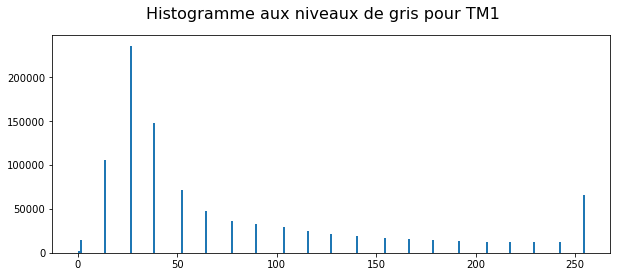

<Figure size 432x288 with 0 Axes>

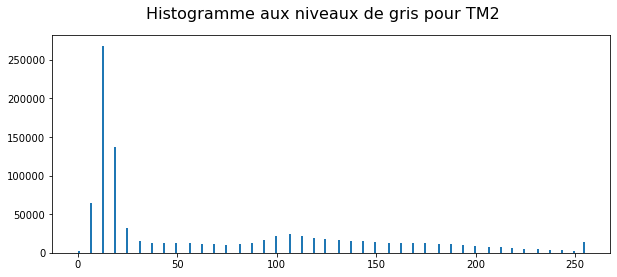

<Figure size 432x288 with 0 Axes>

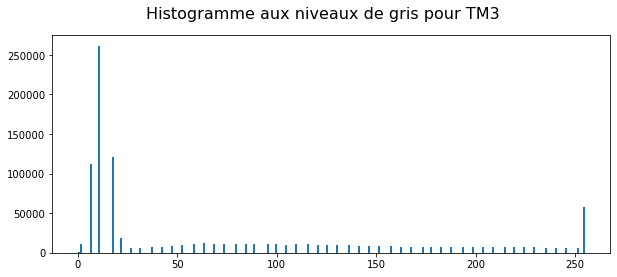

In [77]:
# Charger l'image comme matrice de pixels

img1 = np.array(Image.open('TM1.bmp'))
img2 = np.array(Image.open('TM2.bmp'))
img3 = np.array(Image.open('TM3.bmp'))

# Générer et afficher l'histogramme
fig1=plt.figure()
fig1, ax = plt.subplots(figsize=(10,4)) #taille  d'affichage
n1, bins1, patches1 = plt.hist(img1.flatten(), bins=range(256))
fig1.suptitle('Histogramme aux niveaux de gris pour TM1', fontsize=16) #titre
fig2=plt.figure()
fig2, ax = plt.subplots(figsize=(10,4)) #taille d'affichage 
n2, bins2, patches2= plt.hist(img2.flatten(), bins=range(256))
fig2.suptitle('Histogramme aux niveaux de gris pour TM2', fontsize=16) #titre
fig3=plt.figure()
fig3, ax = plt.subplots(figsize=(10,4)) #taille d'affichage 
n3,bins3, patches3 = plt.hist(img3.flatten(), bins=range(256))
fig3.suptitle('Histogramme aux niveaux de gris pour TM3', fontsize=16) #titre
plt.show()


### Observation : 
on remarque que les histogrames se ressemble legement , il existe un grand nombre de pixels très sombres, comme indiqué dans le graphique par le pic autour de la valeur de niveaux de gris 10-30. Ce n'est pas si surprenant, car l'image d'origine est principalement sur fond bleu=>noir ( mer).

### 2 -  l'hitgramme en niveau de gris pour une image en couleur c'est possible mais ca va rendre les images en Niveaux de gris ensuite il fait l'Histogram pour cela je vais le refaire pour ue image en couleur specialement 

c'est un peu prés la concatenation des 3 histogramme de TM1 ,TM2 et TM3 

<Figure size 432x288 with 0 Axes>

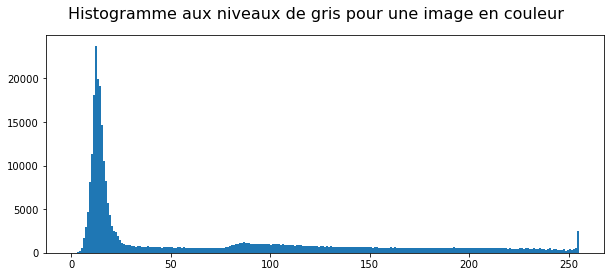

In [78]:
RGB = cv2.imread("rgb.png",0)
fig3=plt.figure()
fig3, ax = plt.subplots(figsize=(10,4)) #taille d'affichage 
n3,bins3, patches3 = plt.hist(RGB.flatten(), bins=range(256))
fig3.suptitle('Histogramme aux niveaux de gris pour une image en couleur', fontsize=16) #titre
plt.show()

##  Pour cela je vais refaire un histogramme  pour une image en couleur en utilisant d'autres fonctions de numpy et de python prédéfini 

Dans notre programme d'histogramme de couleur, nous utilisons un tuple, (canal,  ), comme variable de for. en premier la variable canal prend la valeur 0 qui est le rouge ensuite les valeurs sont la position des canaux verts et "g"et enfin canaux bleus et "b".

Nous utilisons les bords gauche du bac comme positions x pour les valeurs de l'histogramme en indexant le tableau bin_edges pour ignorer la dernière valeur (le bord droit du dernier bac).

nous créons l'histogramme, en appelant la fonction ```np.histogram()``` trois fois, une fois pour chacun des canaux. Nous obtenons les canaux individuels, en découpant l'image le long du dernier axe. Par exemple, nous pouvons obtenir le canal de couleur rouge en appelant ```image [:,:, 0]```.

 et a la fin on fait l'affichage avec les foncionalités de ```matpolib.pyplot``` ,``` plt.show()```

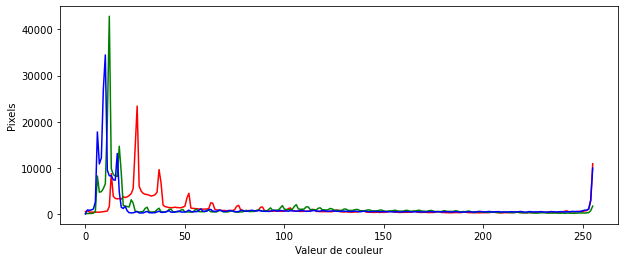

In [74]:
# lire l'image originale, en couleur
image = cv2.imread('rgb.png')

#Nous allons dessiner la ligne d'histogramme pour chaque canal dans une couleur différente, 
#et donc nous créons un tuple des couleurs à utiliser pour les trois lignes 
colors = ("r", "g", "b")
canal = (0, 1, 2)

# créer le tracé de l'histogramme, avec trois lignes, une pour chaque couleur


#zip ()  prend une série d'une ou plusieurs listes et retourne un itérateur de tuples,où le premier tuple contient
#le premier élément de chacune des listes, le second contient le deuxième élément de chacune  ##des listes, etc.

fig, ax = plt.subplots(figsize=(10,4))
for canal, c in zip(canal, colors):
    #Nous calculons l'histogramme du canal actuel avec
    histogram, bin_edges = np.histogram(
        image[:, :, canal], bins=256, range=(0, 256)
    )
    
   # appel de fonction, puis ajoutez une ligne d'histogramme de la couleur correcte au tracé avec le
    plt.plot(bin_edges[0:-1], histogram, color=c)



plt.xlabel("Valeur de couleur")
plt.ylabel("Pixels")

plt.show()

### Observation : 
On remarque que les deux couleur dominantes c'est le bleu et le vert  ( pics) ce qui explique la mer et la verdure des montagnes et des variatiosn vegetales .
